In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
import scipy.linalg

# Poisson Equation

Consider the Diriclet problem for the poisson equation in two dimension, $\textbf{x} = (x,y) \in \Omega \subset R^2$

$$
\begin{cases}
    - \Delta u(\textbf{x}) = f(\textbf{x}) \;\;\;\;\;\;\;\;\;  \textbf{x} \in \Omega \\
    u(\textbf{x}) = g(\textbf{x}) \;\;\;\;\;\;\;\;\;  \textbf{x} \in \partial \Omega
\end{cases}
$$
with
$$
 \Delta u(\textbf{x}) = \frac{\partial^2 u(\textbf{x})}{\partial x^2} + \frac{\partial^2 u(\textbf{x})}{\partial y^2}
$$

# Approximation by finite difference of two dimensional problems

The idea behind finite difference relies approximating the partial derivatives that are present in the PDE by the incremental ratios computed on a suitable grid. The first step therefore consist of introducing computational grid. Assume for semplicity thta $\Omega$ is the rectangle $(a,b) \times (c,d)$. Let us introduce a partition $[a,b]$ in subintervals $(x_k, x_{k+1})$ for $k=0, \dots, N_x$, with $x_0=a$ and $x_{N_x +1} = b$. Let us denote by $\Delta_x = {x_0,\dots, x_{N_x+1}}$ the set of end-points of such intervals and by $h_x = max (x_{k+1} - x_k)$ their maximum length.
In the similar way we introduce a discretization of the y-axis $\Delta_y = {y_0,\dots, y_{N_y+1}}$ with $y_0=c$ and $y_{N_y +1} = d$. The cartesian product $\Delta_h = \Delta_x \times \Delta_y$ provides the computational grid on $\Omega$ and $h=max \{ h_x,h_y \}$ is the charactersitic measure of the grid-size. We are looking for values $u_{i,j}$ which approximate $u(x_i, y_j)$. We will assume for semplicity that the nodes be uniformly spaced. In the case of function of two varibles, the second order derivative is approximated by the following incremental ratios:
$$
\delta_x^2 u_{i,j} = \frac{u_{i-1,j} -2u_{i,j}+u_{i+1,j}}{h_x^2} \\
\delta_y^2 u_{i,j} = \frac{u_{i,j-1} -2u_{i,j}+u_{i,j+1}}{h_y^2}
$$

They are second order accurate w.r.t $h_x$ and $h_y$ respectively.

Replacing it in the laplacian in the Poisson equation formula and requiring that the PDE must be satisfied in all the internal nodes of $\Delta_h$, we obtain the following set of equation:

$$
 - (\delta_x^2 u_{i,j} + \delta_y^2 u_{i,j}) = f_{i,j}  \;\;\;\;\;\;\;\;\;i=1,\dots,N_x, \;\;\;\; j= 1,\dots, N_y
$$
where $f_{i,j} = f(x_i, y_j)$. We must add the equations that enforce the diriclet data at the boundary, which are
$$
    u_{i,j} = g_{i,j} \;\;\;\;\;\; \forall i,j \;\;s.t \;\;(x_i, x_j) \in \partial \Delta_h
$$
where $ \partial \Delta_h$ indicates the set of nodes belonging to the boundary $\partial \Omega$ of $\Omega$. If we make further assumption that the computational grid is uniform in both cartesian directions, $h_x=h_y=h$ we obtain

$$
 - \frac{1}{h^2}(u_{i-1,j} + u_{i,j-1} - 4u_{i,j} + u_{i,j+1} + u_{i+1,j}) = f_{i,j}  ;\;\;\;i=1,\dots,N_x, \;\;\;\; j= 1,\dots, N_y
$$

This is called the __five point scheme for the Laplace operator__.
We note that the unknown associated with the boundary nodes can be eleminated using the diriclet condition and therefore the above system involves only $N = N_x N_y$ unknowns.

Numerating the node from left to right and from top to bottom, we obtain a system of the form
$$
A\textbf{u}_h = h^2 \textbf{f}
$$
where $A \in R^{N \times N}$,

$$
    A = tridiag(D,T,D)
$$
In particular, $D \in R^{N_x \times N_x}$ is a diagonal matrix whose diagonal entries are $-\frac{1}{h^2_y}$ while $T \in R^{N_x \times N_x}$ is a symmetric diagonal matrix:

$$
    T = tridiag(- \frac{1}{h^2_x}, \frac{2}{h^2_x} + \frac{2}{h^2_y}, -\frac{1}{h^2_x})
$$
A is symmetric, positive definite and so non singular. Thus we can cocnlude that the finite difference system admits admits an unique solution $\textbf{u}_h$. 
It is worth pointing out that $A$ is ill-conditioned: it is condition number grows like $h^{-2}$ as $h$ tends to zero.

In [ ]:
def poisson_finite_difference_solver(a,b,c,d, n_x, n_y, f, g):
    
    A = np.zeros((n_x, n_x))

In [93]:



n_x = 10;
n_y = 10
n = n_x*n_y
a = 0;
b = 1;

# Assuming uniform grid h_x = h_y = h
h = (b-a)/n_x


D =  np.diag((-1/h**2)*np.ones(n_x))

k = [(-1/h**2)*np.ones(n_x-1),(2/h**2 + 2/h**2)*np.ones(n_x), (-1/h**2)*np.ones(n_x-1)]
T = scipy.sparse.diags(k, [-1,0,1]).toarray()

A = scipy.linalg.block_diag(D,T,D)

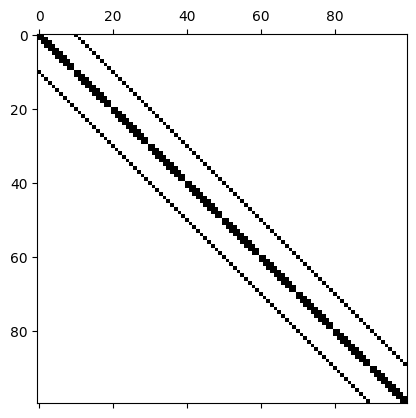

In [95]:
I1 = np.eye(n_x)

I2 = np.eye(n_x, k=1)

I3 = np.eye(n_x, k=-1)

A1 = np.kron(I1, T)

A2 = np.kron(I2, D)

A3 = np.kron(I3, D)

plt.spy(A2+A3+A1)